# Spark Funds - EDA Assignment 
## Name : <font color='Green'>Sameer Gadicherla</font>      Batch : <font color='Green'> 31st March 2021 </font>

## 1. Data Cleaning

### Loading the datasets

In [1]:
## import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

In [2]:
# load the datasets into two different dataframes
companies = pd.read_csv("Data/companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("Data/rounds2.csv", encoding = "ISO-8859-1")

In [3]:
# print the heads to see how the data looks
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.shape

(66368, 10)

In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
# getting number of unique companies in companies df
companies.describe()
# There are 66368 unique permalinks as seen below

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Stormgeo,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
# getting number of unique companies in rounds2 df
rounds2.company_permalink.describe()
# There are 90247 unique permalinks out of 114949 as seen below

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [8]:
# lowercase the permalinks so that its standardised accross the two dataframes
companies.permalink = companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [9]:
# checking the number of companies which are present in rounds but not in companies df
not_present = rounds2[~rounds2.company_permalink.isin(companies.permalink)]

In [10]:
not_present
# we see that there are seven such companies
#looks like the permalinks have special characters

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [11]:
## lets rename the company_permalink field in rounds2 df to permalink so that we can merge both the dataframes on this column

rounds2 = rounds2.rename(columns = {"company_permalink": "permalink"})

In [12]:
## lets check the shape of rounds2 before we add extra companies from companies df
rounds2.shape

(114949, 6)

In [13]:
rounds2

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [14]:
master_frame = companies.merge(rounds2,how="outer",on="permalink")

In [15]:
master_frame.shape

(114954, 15)

In [16]:
##let's check the dtypes
master_frame.dtypes

permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [17]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [18]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median()

funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64

In [19]:
master_frame.groupby("funding_round_type")["funding_round_type"].count()

funding_round_type
angel                     6094
convertible_note          1817
debt_financing            6895
equity_crowdfunding       3257
grant                     2200
non_equity_assistance      191
post_ipo_debt              152
post_ipo_equity            638
private_equity            2285
product_crowdfunding       410
secondary_market            95
seed                     30524
undisclosed               4897
venture                  55494
Name: funding_round_type, dtype: int64

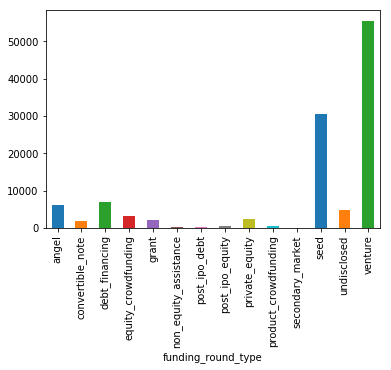

In [20]:
master_frame.groupby("funding_round_type")["funding_round_type"].count().plot.bar()

In [21]:
master_frame = master_frame[master_frame.funding_round_type.isin(["angel","venture","seed","private_equity"])]
master_frame.shape

(94397, 15)

In [22]:
master_frame.groupby("funding_round_type")["funding_round_type"].count()

funding_round_type
angel              6094
private_equity     2285
seed              30524
venture           55494
Name: funding_round_type, dtype: int64

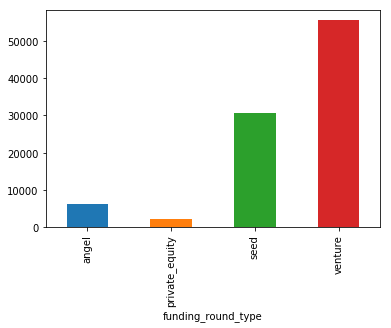

In [23]:
master_frame.groupby("funding_round_type")["funding_round_type"].count().plot.bar()

In [24]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

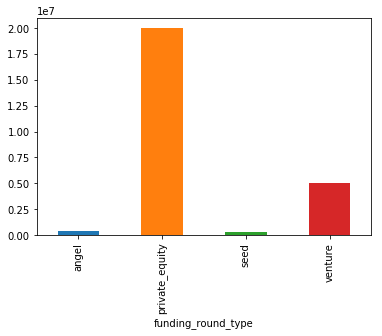

In [25]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median().plot.bar()

## Observations:
### - we see above that most of the investments are happening in the venture level funding 
### - It falls in the range of budget provided by spark funds as well
### - It's median value is 5M

In [27]:
## Let's remove records which aren't of venture type funding
master_frame = master_frame[master_frame.funding_round_type == "venture"]

In [28]:
master_frame.shape

(55494, 15)

## Country Analysis
### Investing in Countries where most other countries have invested

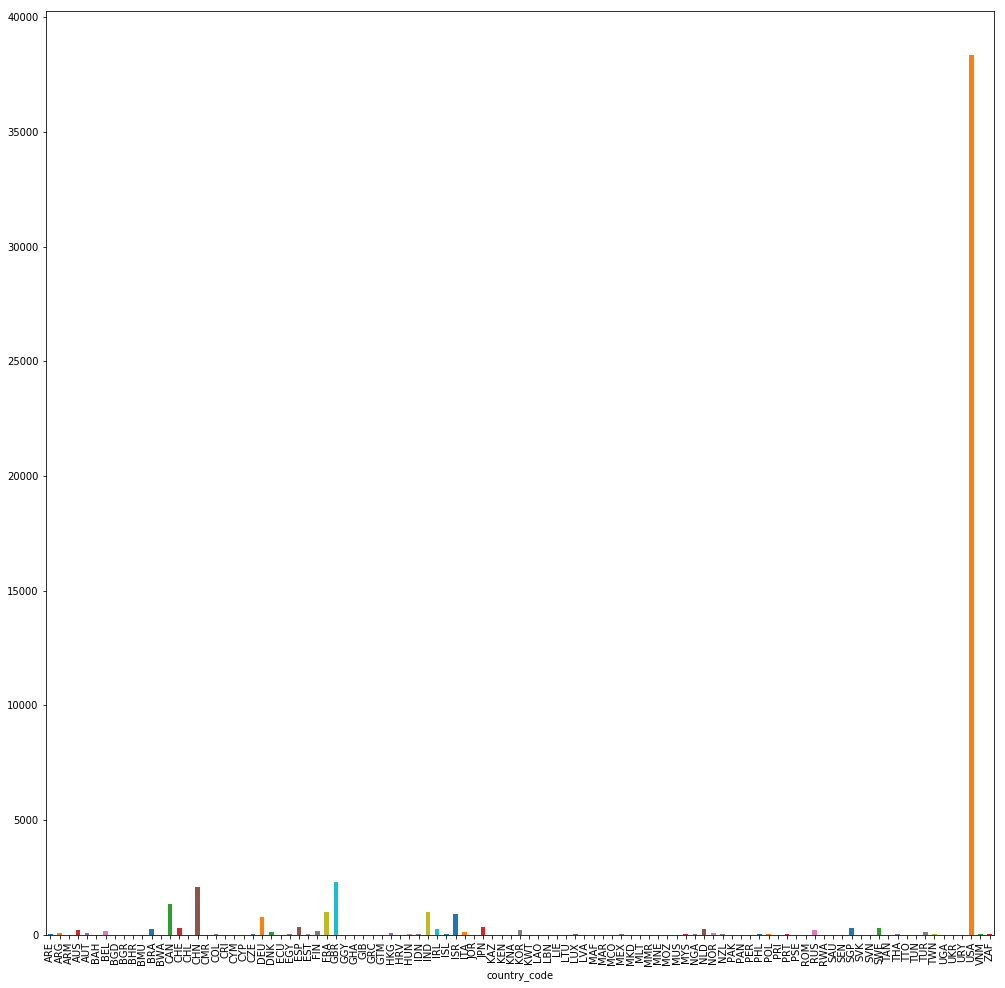

In [29]:
## let's check which country has most investment count
plt.figure(figsize = (17,17))
master_frame.groupby("country_code")["country_code"].count().plot.bar()

In [30]:
temp_df = pd.DataFrame({})
temp_df["Funding"] = master_frame.groupby("country_code")["raised_amount_usd"].sum()
temp_df = temp_df.sort_values("Funding",ascending= False)

#printing the top 9 countries based on the highest funding in all rounds - SUM
top9 = temp_df.iloc[0:9]
print(top9)


                   Funding
country_code              
USA           4.225108e+11
CHN           3.983542e+10
GBR           2.024563e+10
IND           1.439186e+10
CAN           9.583332e+09
FRA           7.259537e+09
ISR           6.907515e+09
DEU           6.346960e+09
JPN           3.363677e+09


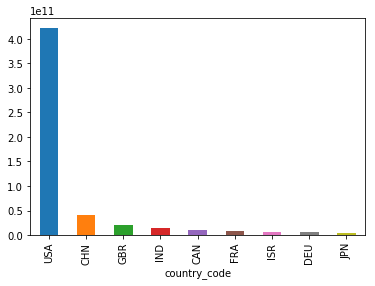

In [31]:
### lets see how they look when plotted on based of sum of the funding
top9.Funding.plot.bar()

## Observations
### <ol><li> USA , GBR , IND are the top three English Speaking countries after checking the wiki page </li> <li> CHN isn't an English Speaking Country according to the wiki page </li></ol>

## Sector Analysis - 1

In [32]:
# lets load the mapping csv into a df
mapping = pd.read_csv("../EDA_SparkFunds/Data/mapping.csv")

In [33]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [34]:
## Column check: Blank is a column is which can be dropped(optional) and is used only for the first row which is empty
mapping.Blanks.sum()

1

In [35]:
x = mapping[mapping.category_list == "Accounting"].iloc[0]
x[x == 1].axes[0][0]

'Social, Finance, Analytics, Advertising'

In [36]:
### write a function which takes the category name as the parameter and gives the main sector as the answer
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        ## We see that there are few primary sectors/categories which do not fall into any of the main sectors, lets 
        ## keep them them into Others
        return "Others"
get_main_sector("3D")

'Manufacturing'

In [37]:
## create a derived column for primary sector by using the name before '|'
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x: str(x).split("|")[0])

In [38]:
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [39]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,"News, Search and Messaging"
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software,Others
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology,Cleantech / Semiconductors
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics,Others
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics,Others
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics,Others
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps,"News, Search and Messaging"


In [40]:
## investments based on main_sector
master_frame.groupby("main_sector")["main_sector"].count()

main_sector
Automotive & Sports                          900
Cleantech / Semiconductors                 10632
Entertainment                               3271
Health                                      4381
Manufacturing                               3791
News, Search and Messaging                  6892
Others                                     17544
Social, Finance, Analytics, Advertising     8083
Name: main_sector, dtype: int64

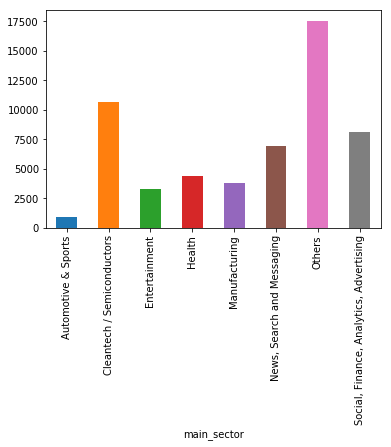

In [41]:
master_frame.groupby("main_sector")["main_sector"].count().plot.bar()

## Observations:
### <ol><li>As of now we see that Others is highly contributed sectors</li><li>CleanTech/Semiconductors is the second highest</li></ol>

## Sector Analysis - 2

In [42]:
## Creating DataFrames per country falling within 5M and 15M brackets
usa = master_frame[(master_frame.country_code == "USA") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
gbr = master_frame[(master_frame.country_code == "GBR") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
ind = master_frame[(master_frame.country_code == "IND") & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

In [44]:
### total no of investments in each of these countries
print(usa.shape[0], " investments in USA")
print(gbr.shape[0], "   investments in UK/GBR")
print(ind.shape[0], "   investments in India")

12150  investments in USA
628    investments in UK/GBR
330    investments in India


In [69]:
### total dollars investmented in each of these countries
print(usa.raised_amount_usd.sum(), "dollars invested total in USA")
print(gbr.raised_amount_usd.sum(), "  dollars invested total in UK/GBR")
print(ind.raised_amount_usd.sum(), "  dollars invested total in India")

108531347515.0 dollars invested total in USA
5436843539.0   dollars invested total in UK/GBR
2976543602.0   dollars invested total in India


In [96]:
#sector wise amount raised in USA
usa.groupby("main_sector")["raised_amount_usd"].sum()

main_sector
Automotive & Sports                        1.454104e+09
Cleantech / Semiconductors                 2.118100e+10
Entertainment                              5.000213e+09
Health                                     8.200859e+09
Manufacturing                              7.258553e+09
News, Search and Messaging                 1.379682e+10
Others                                     3.495910e+10
Social, Finance, Analytics, Advertising    1.668070e+10
Name: raised_amount_usd, dtype: float64

In [118]:
#sector wise count of investments in USA
usa_count = usa.groupby("main_sector")["raised_amount_usd"].count().to_frame()
usa_count = usa_count.sort_values("raised_amount_usd",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
usa_count_top3 = usa_count.iloc[0:3,:]
usa_count_top3

,raised_amount_usd
main_sector,
Others,3924
Cleantech / Semiconductors,2297
"Social, Finance, Analytics, Advertising",1912


In [59]:
#sector wise amount raised in UK
gbr.groupby("main_sector")["raised_amount_usd"].sum()

main_sector
Automotive & Sports                        1.670516e+08
Cleantech / Semiconductors                 1.136905e+09
Entertainment                              4.615111e+08
Health                                     2.145375e+08
Manufacturing                              3.619403e+08
News, Search and Messaging                 6.157462e+08
Others                                     1.657263e+09
Social, Finance, Analytics, Advertising    8.218884e+08
Name: raised_amount_usd, dtype: float64

In [117]:
#sector wise count of investments in UK
gbr_count = gbr.groupby("main_sector")["raised_amount_usd"].count().to_frame()
gbr_count = gbr_count.sort_values("raised_amount_usd",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
gbr_count_top3 = gbr_count.iloc[0:3,:]
gbr_count_top3

,raised_amount_usd
main_sector,
Others,194
Cleantech / Semiconductors,127
"Social, Finance, Analytics, Advertising",98


In [62]:
#sector wise amount raised in India
ind.groupby("main_sector")["raised_amount_usd"].sum()

main_sector
Automotive & Sports                        1.369000e+08
Cleantech / Semiconductors                 1.653800e+08
Entertainment                              2.808300e+08
Health                                     1.677400e+08
Manufacturing                              2.009000e+08
News, Search and Messaging                 4.338345e+08
Others                                     1.300416e+09
Social, Finance, Analytics, Advertising    2.905435e+08
Name: raised_amount_usd, dtype: float64

In [116]:
#sector wise count of investments in India
ind_count = ind.groupby("main_sector")["raised_amount_usd"].count().to_frame()
ind_count = ind_count.sort_values("raised_amount_usd",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
ind_count_top3 = ind_count.iloc[0:3,:]
ind_count_top3

,raised_amount_usd
main_sector,
Others,140
"News, Search and Messaging",52
Entertainment,33


In [122]:
top3_pt = pd.pivot_table(data = pd.concat([usa,gbr,ind]),index=["country_code","main_sector"],aggfunc=len)
top3_pt

category_list  city  \
country_code main_sector                                                    
GBR          Automotive & Sports                                 16    16   
             Cleantech / Semiconductors                         127   127   
             Entertainment                                       54    54   
             Health                                              24    24   
             Manufacturing                                       42    42   
             News, Search and Messaging                          73    73   
             Others                                             194   194   
             Social, Finance, Analytics, Advertising             98    98   
IND          Automotive & Sports                                 13    13   
             Cleantech / Semiconductors                          20    20   
             Entertainment                                       33    33   
             Health                                              19    19   
             Manufacturing                                       21    21   
             News, Search and Messaging                          52    52   
             Others                                             140   140   
             Social, Finance, Analytics, Advertising             32    32   
USA          Automotive & Sports                                167   167   
             Cleantech / Semiconductors                        2297  2297   
             Entertainment                                      580   580   
             Health                                             908   908   
             Manufacturing                                      799   799   
             News, Search and Messaging                        1563  1563   
             Others                                            3924  3924   
             Social, Finance, Analytics, Advertising           1912  1912   

                                                      founded_at  funded_at  \
country_code main_sector                                                      
GBR          Automotive & Sports                              16         16   
             Cleantech / Semiconductors                      127        127   
             Entertainment                                    54         54   
             Health                                           24         24   
             Manufacturing                                    42         42   
             News, Search and Messaging                       73         73   
             Others                                          194        194   
             Social, Finance, Analytics, Advertising          98         98   
IND          Automotive & Sports                              13         13   
             Cleantech / Semiconductors                       20         20   
             Entertainment                                    33         33   
             Health                                           19         19   
             Manufacturing                                    21         21   
             News, Search and Messaging                       52         52   
             Others                                          140        140   
             Social, Finance, Analytics, Advertising          32         32   
USA          Automotive & Sports                             167        167   
             Cleantech / Semiconductors                     2297       2297   
             Entertainment                                   580        580   
             Health                                          908        908   
             Manufacturing                                   799        799   
             News, Search and Messaging                     1563       1563   
             Others                                         3924       3924   
             Social, Finance, Analytics, Advertising        1912       1912 

In [90]:
pt = pd.pivot_table(data = pd.concat([usa,gbr,ind],axis=0),index=["country_code","main_sector"],aggfunc=np.sum)
pt

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                           1.670516e+08
             Cleantech / Semiconductors                    1.136905e+09
             Entertainment                                 4.615111e+08
             Health                                        2.145375e+08
             Manufacturing                                 3.619403e+08
             News, Search and Messaging                    6.157462e+08
             Others                                        1.657263e+09
             Social, Finance, Analytics, Advertising       8.218884e+08
IND          Automotive & Sports                           1.369000e+08
             Cleantech / Semiconductors                    1.653800e+08
             Entertainment                                 2.808300e+08
             Health                                        1.677400e+08
             Manufacturing                                 2.009000e+08
             News, Search and Messaging                    4.338345e+08
             Others                                        1.300416e+09
             Social, Finance, Analytics, Advertising       2.905435e+08
USA          Automotive & Sports                           1.454104e+09
             Cleantech / Semiconductors                    2.118100e+10
             Entertainment                                 5.000213e+09
             Health                                        8.200859e+09
             Manufacturing                                 7.258553e+09
             News, Search and Messaging                    1.379682e+10
             Others                                        3.495910e+10
             Social, Finance, Analytics, Advertising       1.668070e+10

In [91]:
#other way of seeing sum
total_sum = pt.groupby("country_code")["raised_amount_usd"].sum()
total_sum = total_sum.to_frame()
total_sum

,raised_amount_usd
country_code,
GBR,5.436844e+09
IND,2.976544e+09
USA,1.085313e+11


In [113]:
# We know that "Others" is the top sector in all the countries

usa_new = usa[usa.main_sector == "Others"]
usa_new.sort_values("raised_amount_usd",ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
17740,/organization/cashstar,CashStar,http://www.cashstar.com,E-Commerce|Incentives|Loyalty Programs|Payments,operating,USA,ME,"Portland, Maine",Portland,01-12-2007,/funding-round/5f1e307e4abc3e090eaaddb1f32082ae,venture,D,05-08-2015,15000000.0,E-Commerce,Others
87832,/organization/sentilla,Sentilla,http://www.sentilla.com,IT Management|Software,operating,USA,CA,SF Bay Area,Redwood City,01-01-2003,/funding-round/975908ab21482b14e438b420ce31cecf,venture,C,15-08-2011,15000000.0,IT Management,Others
17697,/organization/cash4gold,Cash4Gold,http://www.cash4gold.com,Finance,operating,USA,FL,Ft. Lauderdale,Pompano Beach,01-01-2007,/funding-round/0e019f13707dbfdf85c0dff62309de90,venture,A,01-12-2008,15000000.0,Finance,Others
92288,/organization/solera-networks,Solera Networks,http://www.soleranetworks.com,Analytics|Network Security|Software,acquired,USA,UT,Salt Lake City,South Jordan,01-01-2005,/funding-round/c02e06c79d4618dbce18dacefb111597,venture,C,26-07-2010,15000000.0,Analytics,Others
46030,/organization/identec-solutions,Identec Solutions,http://www.identecsolutions.com,RFID|Software|Tracking|Wireless,operating,USA,TX,Dallas,Addison,01-01-1999,/funding-round/81e6271a9a81a4cb6218850eaee85728,venture,NaN,26-06-2006,15000000.0,RFID,Others
60952,/organization/meraki,Meraki,http://meraki.com,Networking|Network Security,acquired,USA,CA,SF Bay Area,San Francisco,01-04-2006,/funding-round/767a7fa04a0adedae522d3af762c17e7,venture,C,07-02-2011,15000000.0,Networking,Others
60873,/organization/mendocino-software,Mendocino Software,http://www.dciginc.com/2008/02/mendocino-softw...,Software,closed,USA,CA,SF Bay Area,Fremont,01-01-2003,/funding-round/0ed9f8eb7c7022d362a25aa55d36ab35,venture,A,30-03-2004,15000000.0,Software,Others
46240,/organization/ifx-corporation,IFX Corporation,http://www.ifxcorp.com/,NaN,operating,USA,FL,Ft. Lauderdale,Hollywood,NaN,/funding-round/969123f73e30bed1757fd31c39851237,venture,B,27-03-2001,15000000.0,nan,Others
17001,/organization/carbonite,Carbonite,http://www.carbonite.com/,SaaS|Software,ipo,USA,MA,Boston,Boston,10-02-2005,/funding-round/5b12edff3ff7fba8e3cdbb4c6e1add70,venture,B,07-05-2007,15000000.0,SaaS,Others
46396,/organization/ikanos,Ikanos,http://www.ikanos.com,Software,closed,USA,CA,SF Bay Area,Fremont,01-01-2009,/funding-round/d9b9b74831f9e7d38335e3d9e217806b,venture,E,27-04-2004,15000000.0,Software,Others


In [114]:
gbr_new = gbr[gbr.main_sector == "Others"]
gbr_new.sort_values("raised_amount_usd",ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
71032,/organization/opengamma,OpenGamma,http://www.opengamma.com,Financial Services|FinTech|Open Source|Software,operating,GBR,H9,London,London,01-08-2009,/funding-round/e67645665f1fa87fe5df76f960b6247f,venture,C,08-08-2012,15000000.0,Financial Services,Others
9921,/organization/azure-solutions,Azure Solutions,http://www.azuresolutions.com,Software,acquired,GBR,H9,London,London,NaN,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NaN,16-06-2005,15000000.0,Software,Others
114659,/organization/zopa,Zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,Finance,Others
102684,/organization/tribold,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.0,Software,Others
32366,/organization/environmentiq,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,01-01-1988,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.0,Software,Others
89723,/organization/silverrail-technologies,SilverRail Technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,01-04-2009,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15000000.0,Technology,Others
87629,/organization/sensage,SenSage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,18-08-2004,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,NaN,09-04-2008,15000000.0,Security,Others
49821,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01-01-2000,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15000000.0,Software,Others
68637,/organization/notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,E-Commerce,Others
65233,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.0,E-Commerce,Others


In [123]:
ind_new = ind[ind.main_sector == "Others"]
ind_new.sort_values("raised_amount_usd",ascending = False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
56021,/organization/limeroad,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01-01-2012,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.0,E-Commerce,Others
58939,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,B,09-12-2009,15000000.0,Analytics,Others
22278,/organization/commonfloor,CommonFloor,http://www.commonfloor.com,Real Estate,operating,IND,19,Bangalore,Bangalore,01-01-2007,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,F,08-01-2015,15000000.0,Real Estate,Others
35550,/organization/financial-information-network-op...,Financial Information Network & Operations Pvt,http://www.fino.co.in,Finance|FinTech,closed,IND,16,Mumbai,Mumbai,01-01-2006,/funding-round/fff5471135f5744c4c1062d674350b82,venture,NaN,09-12-2009,15000000.0,Finance,Others
35823,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,01-01-2010,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,C,21-01-2014,15000000.0,E-Commerce,Others
39948,/organization/girnarsoft,GirnarSoft,http://www.girnarsoft.com,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,24,Jaipur,Jaipur,01-11-2007,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,A,20-11-2013,15000000.0,Enterprise Software,Others
49911,/organization/ipolicy-networks,iPolicy Networks,http://www.ipolicynet.com,Security,operating,IND,36,New Delhi,Noida,NaN,/funding-round/5960ab7542caab51f2b89207bebd258b,venture,B,04-10-2005,15000000.0,Security,Others
50516,/organization/itzcash-card-ltd,ItzCash Card Ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,C,02-09-2014,15000000.0,Gift Card,Others
51881,/organization/k-12-techno-services,K-12 Techno Services,http://k12technoservices.com,EdTech|Education,operating,IND,2,Secunderabad,Secunderabad,NaN,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,NaN,08-09-2010,15000000.0,EdTech,Others
58941,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01-01-2003,/funding-round/7db541211550feab15626b11aa479116,venture,C,15-02-2012,15000000.0,Analytics,Others


In [137]:
pt3 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code","main_sector"],values=["raised_amount_usd"],aggfunc=len)

In [138]:
### clear view of all sectors per country with the respective counts
pt3

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                                   16.0
             Cleantech / Semiconductors                           127.0
             Entertainment                                         54.0
             Health                                                24.0
             Manufacturing                                         42.0
             News, Search and Messaging                            73.0
             Others                                               194.0
             Social, Finance, Analytics, Advertising               98.0
IND          Automotive & Sports                                   13.0
             Cleantech / Semiconductors                            20.0
             Entertainment                                         33.0
             Health                                                19.0
             Manufacturing                                         21.0
             News, Search and Messaging                            52.0
             Others                                               140.0
             Social, Finance, Analytics, Advertising               32.0
USA          Automotive & Sports                                  167.0
             Cleantech / Semiconductors                          2297.0
             Entertainment                                        580.0
             Health                                               908.0
             Manufacturing                                        799.0
             News, Search and Messaging                          1563.0
             Others                                              3924.0
             Social, Finance, Analytics, Advertising             1912.0

In [149]:
##create a pivot table with the counts of each category under a country
pt4 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code"],columns="main_sector",values="raised_amount_usd",aggfunc=len)

In [150]:
pt4

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,16.0,127.0,54.0,24.0,42.0,73.0,194.0,98.0
IND,13.0,20.0,33.0,19.0,21.0,52.0,140.0,32.0
USA,167.0,2297.0,580.0,908.0,799.0,1563.0,3924.0,1912.0


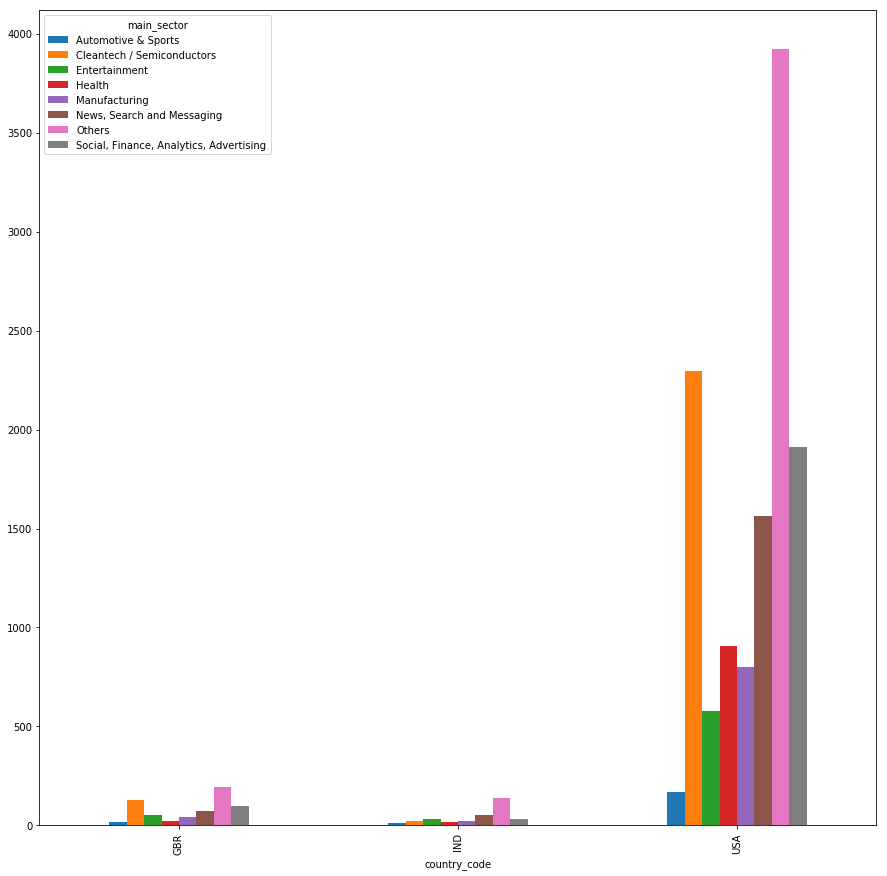

In [151]:
pt4.plot(kind = "bar" , stacked=False,figsize=(15,15))

## 